# Test ROCKET

In [21]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets import load_basic_motions  # multivariate dataset
from sktime.transformations.panel.rocket import Rocket

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Univariate Time Series

In [22]:
X_train, y_train = load_arrow_head(split="train", return_X_y=True)

In [23]:
X_train.head()

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...


In [24]:
y_train

array(['0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0',
       '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1',
       '2', '0', '1', '2', '0', '1', '2', '0', '1', '2'], dtype='<U1')

In [25]:
rocket = Rocket()  # by default, ROCKET uses 10,000 kernels
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [26]:
classifier = make_pipeline(StandardScaler(with_mean=False), RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)))
classifier.fit(X_train_transform, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])

In [27]:
X_test, y_test = load_arrow_head(split="test", return_X_y=True)
X_test_transform = rocket.transform(X_test)

In [28]:
y_pred = classifier.predict(X_test_transform)

In [29]:
accuracy_score(y_test, y_pred)

0.8057142857142857

## Multivariate Time Series

In [30]:
X_train, y_train = load_basic_motions(split="train", return_X_y=True)

In [31]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...
1,0 0.377751 1 0.377751 2 2.952965 3...,0 -0.610850 1 -0.610850 2 0.970717 3...,0 -0.147376 1 -0.147376 2 -5.962515 3...,0 -0.103872 1 -0.103872 2 -7.593275 3...,0 -0.109198 1 -0.109198 2 -0.697804 3...,0 -0.037287 1 -0.037287 2 -2.865789 3...
2,0 -0.813905 1 -0.813905 2 -0.424628 3...,0 0.825666 1 0.825666 2 -1.305033 3...,0 0.032712 1 0.032712 2 0.826170 3...,0 0.021307 1 0.021307 2 -0.372872 3...,0 0.122515 1 0.122515 2 -0.045277 3...,0 0.775041 1 0.775041 2 0.383526 3...
3,0 0.289855 1 0.289855 2 -0.669185 3...,0 0.284130 1 0.284130 2 -0.210466 3...,0 0.213680 1 0.213680 2 0.252267 3...,0 -0.314278 1 -0.314278 2 0.018644 3...,0 0.074574 1 0.074574 2 0.007990 3...,0 -0.079901 1 -0.079901 2 0.237040 3...
4,0 -0.123238 1 -0.123238 2 -0.249547 3...,0 0.379341 1 0.379341 2 0.541501 3...,0 -0.286006 1 -0.286006 2 0.208420 3...,0 -0.098545 1 -0.098545 2 -0.023970 3...,0 0.058594 1 0.058594 2 0.175783 3...,0 -0.074574 1 -0.074574 2 0.114525 3...


In [32]:
y_train

array(['Standing', 'Standing', 'Standing', 'Standing', 'Standing',
       'Standing', 'Standing', 'Standing', 'Standing', 'Standing',
       'Running', 'Running', 'Running', 'Running', 'Running', 'Running',
       'Running', 'Running', 'Running', 'Running', 'Walking', 'Walking',
       'Walking', 'Walking', 'Walking', 'Walking', 'Walking', 'Walking',
       'Walking', 'Walking', 'Badminton', 'Badminton', 'Badminton',
       'Badminton', 'Badminton', 'Badminton', 'Badminton', 'Badminton',
       'Badminton', 'Badminton'], dtype='<U9')

In [33]:
rocket = Rocket()
rocket.fit(X_train)
X_train_transform = rocket.transform(X_train)

In [34]:
classifier = make_pipeline(StandardScaler(with_mean=False), RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)))
classifier.fit(X_train_transform, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])

In [35]:
X_test, y_test = load_basic_motions(split="test", return_X_y=True)
X_test_transform = rocket.transform(X_test)

In [36]:
y_pred = classifier.predict(X_test_transform)

In [37]:
accuracy_score(y_test, y_pred)

1.0

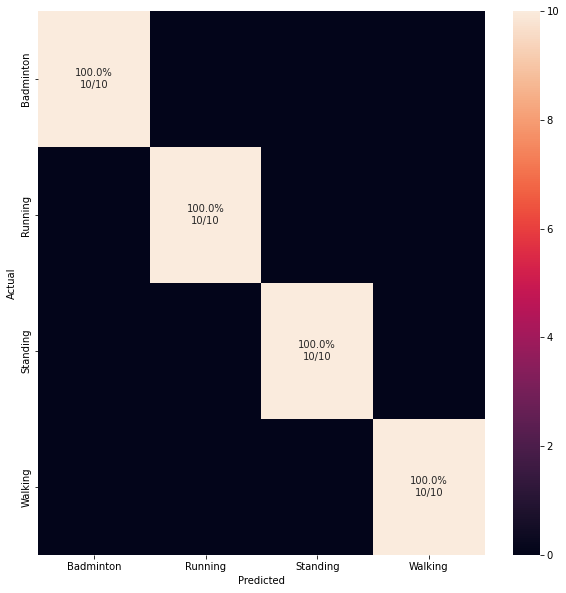

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, classifier.classes_, ymap=None, figsize=(10,10))